### 1. Instalation

Install PyPDF2 and py-readability-metrics

In [2]:
!pip install PyPDF2 py-readability-metrics wordcloud nltk

### 2. Import libraries

import nltk

In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
#nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/alanbarba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alanbarba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alanbarba/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 3. Issue at hand and impressions

Both articles address plagiarism allegations against former Harvard president Claudine Gay. Reuters' Gabriella Borter focuses on the facts and details of the case in a journalistic chronicle. Fox News' Brian Flood adds more quotes to its note, giving the impression that Harvard is being less than responsive and accountable.

### 4. Use PyPDF2 to extract text

In [75]:
from PyPDF2 import PdfReader

# File Location
fox_path = "/Users/alanbarba/Desktop/MBA/Babson/2025/Fall 2025/Advance Programming/Session 5/foxnews.com.pdf"
reuters_path = "/Users/alanbarba/Desktop/MBA/Babson/2025/Fall 2025/Advance Programming/Session 5/reuters.com.pdf"

def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# Extract text from both
fox_text = extract_text_from_pdf(fox_path)
reuters_text = extract_text_from_pdf(reuters_path)
text = (fox_text or "") + "\n\n" + (reuters_text or "")

print("Fox length:", len(fox_text))
print("Reuters length:", len(reuters_text))

print("FOX NEWS")
print(fox_text)
print("\n\nREUTERS")
print(reuters_text)

Fox length: 5330
Reuters length: 3620
FOX NEWS
1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously repor

#### Anomalies

The text not only displays the story, but also external links, such as  "Video, Fox News’ David Rutz contributed to this report.  CLICK HERE T O GET THE FOX NEWS APP, Brian Flood is a media editor/reporter for FOX News Digital. Twitter: @briansflood." It would be good to remove them from the extraction.

### 5. Complete sentiment analysis for each of the articles

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [28]:
# Sentiment scores for each article
fox_scores = sia.polarity_scores(fox_text)
reuters_scores = sia.polarity_scores(reuters_text)

print("Fox News Sentiment Scores:", fox_scores)
print("Reuters Sentiment Scores:", reuters_scores)

Fox News Sentiment Scores: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Reuters Sentiment Scores: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


#### Interpreting the results

The results show that the Fox News article has a composite score of 0.72, while the Reuters article has a composite score of -0.97. This means that the Fox article has a more positive tone than the Reuters article. I considered Reuters to be more objective and less emotional overall.

I was surprised by the result. In my opinion, the Fox article focused more on biased opinions, which could increase negative sentiment scores, while the Reuters article uses more data. Therefore, these results do not match my perception.

### 6. Sentiment analysis on the article headlines

In [36]:
# Define headlines
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

print("FOX:", fox_headline)
print("REUTERS:", reuters_headline)

FOX: Embattled Harvard University President Claudine Gay hit with more plagiarism charges
REUTERS: Harvard president will submit dissertation edits after plagiarism allegations


In [38]:
# Use SentimentIntensityAnalyzer
fox_headline_scores = sia.polarity_scores(fox_headline)
reuters_headline_scores = sia.polarity_scores(reuters_headline)

print("Fox Headline Sentiment:", fox_headline_scores)
print("Reuters Headline Sentiment:", reuters_headline_scores)

Fox Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Interpreting the results

The headlines are more in line with what I thought the results of each story would be.

### 7. Complete 2-3 different readability scores

In [59]:
from readability import Readability

def readability_scores(name: str, txt: str):
    r = Readability(txt)

    out = {"source": name}
    # 1) Flesch Reading Ease 
    try:
        fre = r.flesch()
        out["Flesch_Reading_Ease"] = fre.score
    except Exception as e:
        out["Flesch_Reading_Ease"] = f"err: {e}"

    # 2) Flesch–Kincaid Grade Level 
    try:
        fk = r.flesch_kincaid()
        out["FK_Grade_Level"] = fk.grade_level
    except Exception as e:
        out["FK_Grade_Level"] = f"err: {e}"

    # 3) Gunning Fog 
    try:
        gf = r.gunning_fog()
        out["Gunning_Fog_Index"] = gf.score
    except Exception as e:
        out["Gunning_Fog_Index"] = f"err: {e}"

    return out

fox_read = readability_scores("Fox News", fox_text)
reuters_read = readability_scores("Reuters", reuters_text)

fox_read, reuters_read

({'source': 'Fox News',
  'Flesch_Reading_Ease': 21.41115320671068,
  'FK_Grade_Level': '19',
  'Gunning_Fog_Index': 21.868487077434633},
 {'source': 'Reuters',
  'Flesch_Reading_Ease': 16.550377619402184,
  'FK_Grade_Level': '19',
  'Gunning_Fog_Index': 19.59404318689501})

#### Interpreting the results

According to the results of the metrics used, both articles are very difficult to read, with long sentences and complex, college-level words.

### 8. Create word clouds

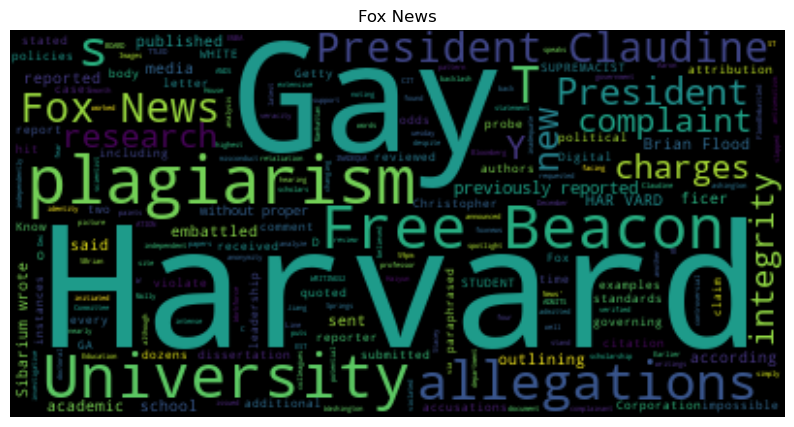

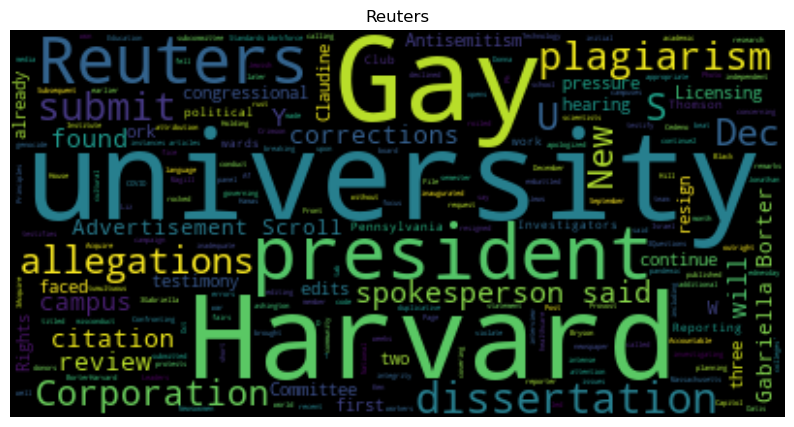

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Fox
cloud_fox = WordCloud(stopwords=STOPWORDS).generate(fox_text)
plt.figure(figsize=(10, 6))
plt.imshow(cloud_fox, interpolation="bilinear")
plt.axis("off")
plt.title("Fox News")
plt.show()

# Reuters
cloud_reuters = WordCloud(stopwords=STOPWORDS).generate(reuters_text)
plt.figure(figsize=(10, 6))
plt.imshow(cloud_reuters, interpolation="bilinear")  # <- use cloud_reuters, not reuters_text
plt.axis("off")
plt.title("Reuters")
plt.show()

#### Interpreting the results

Most repeated words: Harvard, University, Gay, and each one's name.